### Create a Simple Workflow

Goal: Generate a joke and its explanation while using the concept of persistence to store and retain previous state values.

In [4]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict,Literal , Annotated
from dotenv import load_dotenv
from pydantic import BaseModel, Field
from langchain_core.messages import AIMessage, HumanMessage , SystemMessage , BaseMessage
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import InMemorySaver
import os
import operator

In [2]:
load_dotenv()

True

In [3]:
api_key = os.getenv("GEMINI_API_KEY")

model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    google_api_key=api_key  
)

In [5]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [6]:
def generate_joke(state: JokeState):
    topic = state['topic']
    prompt = f"Tell me a funny joke about {topic}."
    response = model.invoke(prompt).content
    return {
        "joke": response
    }

In [7]:
def generate_explanation(state: JokeState):
    joke = state['joke']
    prompt = f"Write an explanation for the following joke: {joke}"
    response = model.invoke(prompt).content
    return {
        "explanation": response
    }

# Wrokflow

<img src="per.png" width=450px height=600px>

In [8]:


graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)


graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

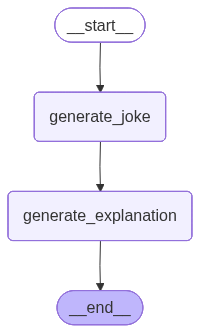

In [16]:
workflow

In [9]:

initial_state = {
    "topic": "computers"
}

### Set Thread ID

In [10]:
config1 = {
    "configurable":{
        "thread_id" : "1"
    }
}

### Execution

In [13]:
workflow.invoke(initial_state,config=config1)

{'topic': 'computers',
 'joke': 'Why was the computer cold?\n\nBecause it left its Windows open!',
 'explanation': 'This is a classic pun that plays on the double meaning of the word "Windows":\n\n1.  **Physical Windows:** In the real world, if you leave the **windows** (the glass openings in a house or car) open, especially when it\'s cold outside, the inside will get cold.\n\n2.  **Computer "Windows":** "Windows" is also the name of a very popular operating system developed by Microsoft (e.g., Windows 10, Windows 11). When you\'re using a computer with the Windows OS, you open various programs and applications, and each one typically appears in its own graphical "**window**" on the screen.\n\nThe joke pretends that the computer "leaving its Windows open" (meaning, the operating system was running and perhaps many application windows were open) has the same physical effect as leaving actual windows open in a house, making the computer "cold." It\'s a humorous anthropomorphism (giving 

### Final State Values

In [14]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'computers', 'joke': 'Why was the computer cold?\n\nBecause it left its Windows open!', 'explanation': 'This is a classic pun that plays on the double meaning of the word "Windows":\n\n1.  **Physical Windows:** In the real world, if you leave the **windows** (the glass openings in a house or car) open, especially when it\'s cold outside, the inside will get cold.\n\n2.  **Computer "Windows":** "Windows" is also the name of a very popular operating system developed by Microsoft (e.g., Windows 10, Windows 11). When you\'re using a computer with the Windows OS, you open various programs and applications, and each one typically appears in its own graphical "**window**" on the screen.\n\nThe joke pretends that the computer "leaving its Windows open" (meaning, the operating system was running and perhaps many application windows were open) has the same physical effect as leaving actual windows open in a house, making the computer "cold." It\'s a humorous anthro

### All State Values

In [15]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'computers', 'joke': 'Why was the computer cold?\n\nBecause it left its Windows open!', 'explanation': 'This is a classic pun that plays on the double meaning of the word "Windows":\n\n1.  **Physical Windows:** In the real world, if you leave the **windows** (the glass openings in a house or car) open, especially when it\'s cold outside, the inside will get cold.\n\n2.  **Computer "Windows":** "Windows" is also the name of a very popular operating system developed by Microsoft (e.g., Windows 10, Windows 11). When you\'re using a computer with the Windows OS, you open various programs and applications, and each one typically appears in its own graphical "**window**" on the screen.\n\nThe joke pretends that the computer "leaving its Windows open" (meaning, the operating system was running and perhaps many application windows were open) has the same physical effect as leaving actual windows open in a house, making the computer "cold." It\'s a humorous anthr